<a href="https://colab.research.google.com/github/kedarvoggu/Movie-recommendation/blob/main/group8_CSED_An_Explainable_Recommended_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Reading Datasets</b>

In [ ]:
links = pd.read_csv('https://raw.githubusercontent.com/kedarvoggu/Movie-recommendation/main/links.csv')
movies = pd.read_csv('https://raw.githubusercontent.com/kedarvoggu/Movie-recommendation/main/movies.csv')
ratings = pd.read_csv('https://raw.githubusercontent.com/kedarvoggu/Movie-recommendation/main/ratings.csv')

<b>Viewing Data</b>

In [ ]:
display(movies.head())
print('Shape- ',movies.shape)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Shape-  (27278, 3)


In [ ]:
display(ratings.head())
print('Shape- ',ratings.shape)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


Shape-  (1048575, 4)


In [ ]:
display(links.head())
print('Shape - ',links.shape)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Shape -  (27278, 3)


In [ ]:
# column names of each dataset

print('Movies - ',list(movies.columns))
print('ratings - ',list(ratings.columns))
print('links - ',list(links.columns))

Movies -  ['movieId', 'title', 'genres']
ratings -  ['userId', 'movieId', 'rating', 'timestamp']
links -  ['movieId', 'imdbId', 'tmdbId']


Pre-Processing

In [ ]:
ratings.drop('timestamp',inplace=True,axis=1)

<b> Data Cleaning</b>

In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
ratings.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [ ]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     252
dtype: int64

There is some unwanted data in links data set. So we should clean the data set

In [ ]:
links.dropna(inplace=True)

In [ ]:
links.reset_index(drop=True)
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

<b>Now the data is clean</b>

<h2>Data Analysis</h2>

In [ ]:
# Get the Movies count of each genres

gc = pd.DataFrame(movies.groupby('genres')['genres'].count())
gc.rename(columns = {'genres':'Count'}, inplace = True)
gc

,Count
genres,
(no genres listed),246
Action,178
Action|Adventure,86
Action|Adventure|Animation,18
Action|Adventure|Animation|Children,8
...,...
Thriller|War,9
Thriller|Western,2
War,32


In [ ]:
# Different Types of rating given by the users

list(ratings['rating'].unique())

[3.5, 4.0, 3.0, 4.5, 5.0, 2.0, 1.0, 2.5, 0.5, 1.5]

In [ ]:
# Get the Count of each rating 

d=pd.DataFrame(ratings.groupby('rating')['rating'].count())
d.rename(columns = {'rating':'Count'}, inplace = True)
d

,Count
rating,
0.5,13232
1.0,35144
1.5,14029
2.0,74706
2.5,44791
3.0,226202
3.5,112926
4.0,295135
4.5,79848


In [ ]:
# Percentage of each rating

count_ratings = pd.DataFrame(ratings.groupby('rating').count())
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)
count_ratings['perc_total']

rating
0.5     1.3
1.0     3.4
1.5     1.3
2.0     7.1
2.5     4.3
3.0    21.6
3.5    10.8
4.0    28.1
4.5     7.6
5.0    14.5
Name: perc_total, dtype: float64

In [ ]:
# no of users had Given rating for any movie

len(ratings['userId'].unique())

7120

In [ ]:
genre_list = ""
for index,row in movies.iterrows():
        genre_list += row.genres + "|"
#split the string into a list of values
genre_list_split = genre_list.split('|')
#de-duplicate values
new_list = list(set(genre_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
new_list

['Documentary',
 'Mystery',
 '(no genres listed)',
 'Children',
 'Romance',
 'Film-Noir',
 'IMAX',
 'Adventure',
 'Drama',
 'Action',
 'Horror',
 'Crime',
 'Fantasy',
 'Thriller',
 'Comedy',
 'Western',
 'Sci-Fi',
 'Animation',
 'Musical',
 'War']

In [ ]:
ratings_pivot = ratings.pivot(index='movieId',columns='userId',values='rating')
ratings_pivot.fillna(0,inplace=True)
ratings_pivot.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,7081,7082,7083,7084,7085,7086,7087,7088,7089,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,4.5,4.0,4.0,4.5,0.0,3.0,0.0,0.0,5.0,0.0,0.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,...,5.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,4.5
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.5,0.0,0.0,0.0,0.0


<h2>Data Visualization</h2>

**Visualising the total percentage  for each rating**

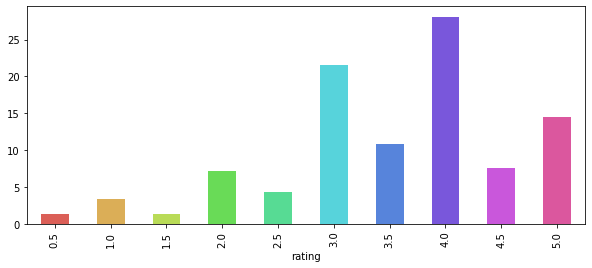

In [ ]:
plt.figure(figsize=(10,4))

count_ratings = ratings.groupby('rating').count()
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)
count_ratings['perc_total'].plot.bar(color=sns.color_palette('hls',10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


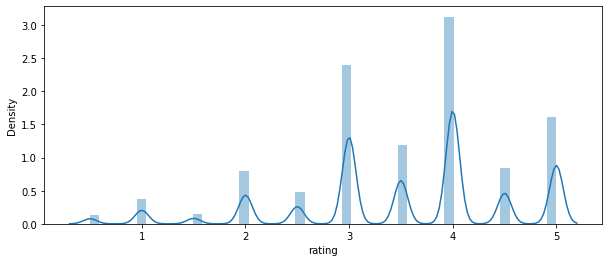

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(ratings["rating"])

**Most popular genres**

In [ ]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

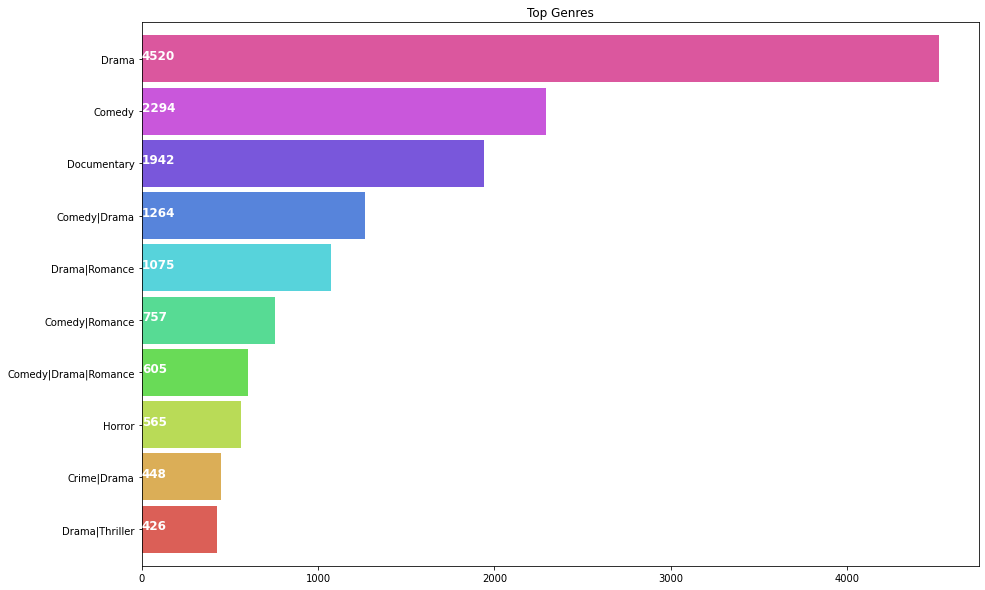

In [ ]:
plt.subplots(figsize=(15,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
ax.spines['left'].set_visible(True)
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

**Aggregating the number of users who voted and the number of movies that were voted.**

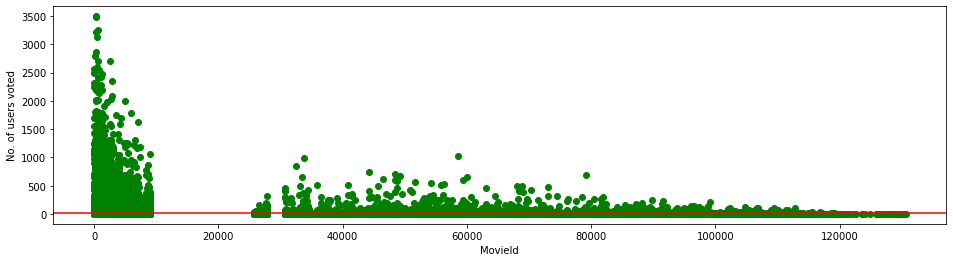

In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='green')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

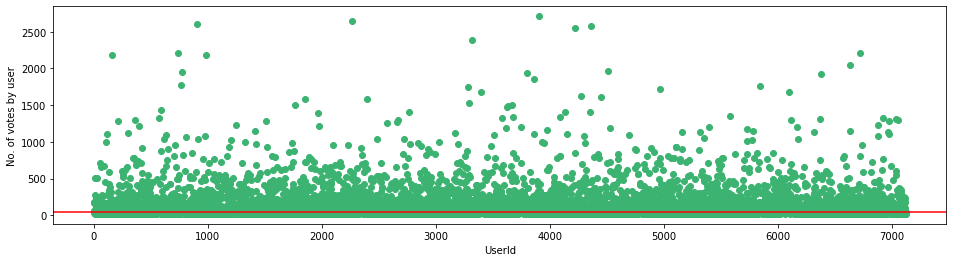

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()